In [519]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus
from sklearn import metrics, tree
from sklearn.naive_bayes import GaussianNB
import pylab as pl
import seaborn as sns
from PIL import *
import PIL.Image
from sklearn.tree import DecisionTreeClassifier

<h1> Preliminary Analysis </h1>

In [520]:
df1 = pd.read_csv("titanic_train.csv")
df2 = pd.read_csv("titanic_test.csv")
df1.sort_values(by=['PassengerId'])
df2.sort_values(by=['PassengerId'])

train_df = df1
test_df = df2

df1.dtypes
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
FullName        object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [521]:
train_df



,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,299,1,1,Saalfeld,Mr. Adolphe,male,NaN,0,0,19988,30.5000,C106,S
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.0,0,1,PC 17558,247.5208,B58 B60,C
2,301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,NaN,0,0,9234,7.7500,NaN,Q
3,302,1,3,McCoy,Mr. Bernard,male,NaN,2,0,367226,23.2500,NaN,Q
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.0,0,0,LINE,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,887,0,2,Montvila,Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S
589,888,1,1,Graham,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S
590,889,0,3,Johnston,Miss. Catherine Helen Carrie,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
591,890,1,1,Behr,Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C


In [522]:
test_df

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,294,0,3,Haas,Miss. Aloisia,female,24.0,0,0,349236,8.8500,NaN,S
294,295,0,3,Mineff,Mr. Ivan,male,24.0,0,0,349233,7.8958,NaN,S
295,296,0,1,Lewy,Mr. Ervin G,male,NaN,0,0,PC 17612,27.7208,NaN,C
296,297,0,3,Hanna,Mr. Mansour,male,23.5,0,0,2693,7.2292,NaN,C


In [523]:
#Checking which attributes have the most missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,450,75.9
Age,120,20.2
Embarked,1,0.2
Fare,0,0.0
Ticket,0,0.0


In [524]:
train_df.sum

<bound method DataFrame.sum of      PassengerId  Survived  Pclass      Name  \
0            299         1       1  Saalfeld   
1            300         1       1    Baxter   
2            301         1       3     Kelly   
3            302         1       3     McCoy   
4            303         0       3   Johnson   
..           ...       ...     ...       ...   
588          887         0       2  Montvila   
589          888         1       1    Graham   
590          889         0       3  Johnston   
591          890         1       1      Behr   
592          891         0       3    Dooley   

                                     FullName     Sex   Age  SibSp  Parch  \
0                                 Mr. Adolphe    male   NaN      0      0   
1     Mrs. James (Helene DeLaudeniere Chaput)  female  50.0      0      1   
2             Miss. Anna Katherine Annie Kate  female   NaN      0      0   
3                                 Mr. Bernard    male   NaN      2      0   
4      

A.1.1

We have two different files, one is for the test and the other one is for training.
They are identical in the attributes but the values are different,and the size is different. We are going to use
the training data set for our model to predict some values (most probably survivalability of the passenger) with
the model that we train with train data set. Train data sethas 593 person and the test dataset has 298 person. 
The proportion of test and train is around 1:3.

Using head(), we can see the columns in our data set and see that not all values are filled and some of them are missing. With dtypes, we can see that not all value arein the same types. SOme are int64, float64, and some are object.

With isnull(), we can check if some data are missing or not.If it returns true, it means that the value is empty. But the missing values like age are empty but not None. Because when we use function sum(), it doesn't return an error. Virtually, if we add an integer with none,it should return Undefined (which wll result to an error). The Missing value are NaN which is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.


Text(0, 0.5, 'Individuals')

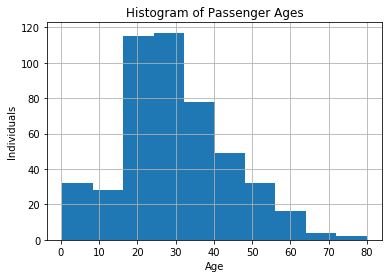

In [525]:
dfAge = df1['Age']
histo_survived = dfAge.hist()
pl.title("Histogram of Passenger Ages")
pl.xlabel("Age")
pl.ylabel("Individuals")

In [526]:
surv = train_df['Survived'].sum()
passNum = len(train_df)
percSurv = (surv/passNum) * 100
print('Percentage of survival is', percSurv,'%')

Percentage of survival is 39.79763912310287 %


Percentage of survival is 39.79763912310287 %


In [527]:

firstClass = train_df[train_df['Pclass']==1]
secondClass = train_df[train_df['Pclass']==2]
thirdClass = train_df[train_df['Pclass']==3]

lenF = len(firstClass)
lenS = len(secondClass)
lenT = len(thirdClass)

#first class
fSurv = firstClass[firstClass['Survived']==1]
fDied = firstClass[firstClass['Survived']==0]
fPerc = (len(fSurv)/(len(fDied)+len(fSurv)) )*100
print('First Class Percentage of survival is', fPerc,'%')

#second class
tSurv = thirdClass[thirdClass['Survived']==1]
tDied = thirdClass[thirdClass['Survived']==0]
sSurvLen = len(sSurv)
totPasLenSec = len(sDied) + len(sSurv)
sPerc = (sSurvLen/totPasLenSec)*100
print('Second Class Percentage of survival is', sPerc,'%')

#thirdClass
sSurv = secondClass[secondClass['Survived']==1]
sDied = secondClass[secondClass['Survived']==0]
tSurvLen = len(tSurv)
totPasLenThi = len(tDied) + len(tSurv)
tPerc = (tSurvLen/totPasLenThi)*100
print('Second Class Percentage of survival is', tPerc,'%')


First Class Percentage of survival is 68.83116883116884 %
Second Class Percentage of survival is 50.0 %
Second Class Percentage of survival is 21.58730158730159 %


First Class Percentage of survival is 68.83116883116884%<br/>
Second Class Percentage of survival is 50.0% <br/>
Second Class Percentage of survival is 21.58730158730159%

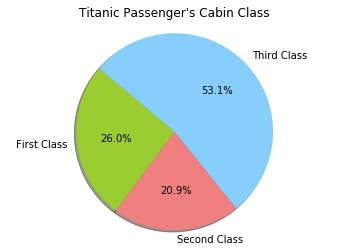

In [528]:
# Data to plot
labels = 'First Class', 'Second Class', 'Third Class'
sizes = [lenF,lenS, lenT]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')

plt.axis('equal')
plt.title("Titanic Passenger's Cabin Class")
plt.show()

In [529]:
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
#Women
wSurv = women[women['Survived']==1]
wDied = women[women['Survived']==0]
wPerc = (len(wSurv)/(len(wDied)+len(wSurv)) )*100
print('Percentage of women survival is', wPerc,'%')

#Men
mSurv = men[men['Survived']==1]
mDied = men[men['Survived']==0]
mPerc = (len(mSurv)/(len(mDied)+len(mSurv)) )*100
print('Percentage of Men survival is', mPerc,'%')


Percentage of women survival is 75.96153846153845 %
Percentage of Men survival is 20.259740259740262 %


Percentage of women survival is 75.96153846153845 %<br/>
Percentage of Men survival is 20.259740259740262 % <br/>


In [530]:
data = [train_df, test_df]

for dataset in data:
    meanAge = train_df["Age"].mean()
    stdAge = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(meanAge - stdAge, meanAge + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice

for dataset in data:
    dataset['Child'] = dataset['Age'].apply(lambda x: 0 if x >= 18 else 1)




A.1.2.

To handle the missing data,I created an array of random number. 
This random number is computed in regards to the mean age value and the standard deviation.

In [531]:
ch = train_df[train_df['Child']==1]
ad = train_df[train_df['Child']==0]
#Adult
aSurv = ad[ad['Survived']==1]
aDied = ad[ad['Survived']==0]
aSurvLen = len(aSurv)
totPasLenAd = len(aDied) + len(aSurv)
aPerc = (aSurvLen/totPasLenAd)*100
print('Percentage of survival for adults is', aPerc,'%')



#Children
cSurv = ch[ch['Survived']==1]
cDied = ch[ch['Survived']==0]
cSurvLen = len(cSurv)
totPasLenCh = len(cDied) + len(cSurv)
cPerc = (cSurvLen/totPasLenCh)*100
print('Percentage of survival for children is', cPerc,'%')       

Percentage of survival for adults is 37.66990291262136 %
Percentage of survival for children is 53.84615384615385 %


Percentage of survival for adults is 37.66990291262136 % <br/>
Percentage of survival for children is 53.84615384615385 %


In [532]:
train_df

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
0,299,1,1,Saalfeld,Mr. Adolphe,male,39.0,0,0,19988,30.5000,C106,S,0
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.0,0,1,PC 17558,247.5208,B58 B60,C,0
2,301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,26.0,0,0,9234,7.7500,NaN,Q,0
3,302,1,3,McCoy,Mr. Bernard,male,25.0,2,0,367226,23.2500,NaN,Q,0
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.0,0,0,LINE,0.0000,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,887,0,2,Montvila,Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S,0
589,888,1,1,Graham,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,0
590,889,0,3,Johnston,Miss. Catherine Helen Carrie,female,24.0,1,2,W./C. 6607,23.4500,NaN,S,0
591,890,1,1,Behr,Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,0


In [533]:
#Adult Male
amPerc = ((aPerc/100)*(mPerc/100))
awPerc = ((aPerc/100)*(wPerc/100))
cmPerc = ((cPerc/100)*(mPerc/100))*100
cwPerc = ((cPerc/100)*(wPerc/100))*100

print('Survival rate for adult men is', amPerc)
print('Survival rate for adults women is', awPerc)

print('Survival rate for child male is', cmPerc)
print('Survival rate for child female is', cwPerc)

Survival rate for adult men is 0.0763182448619342
Survival rate for adults women is 0.2861463778939507
Survival rate for child male is 10.909090909090908
Survival rate for child female is 40.90236686390532


Survival rate for adult men is 0.0763182448619342 <br/>
Survival rate for adults women is 0.2861463778939507 <br/>
Survival rate for child male is 10.909090909090908 <br/>
Survival rate for child female is 40.90236686390532


In [534]:
#first class
fSurv = firstClass[firstClass['Survived']==1]
fDied = firstClass[firstClass['Survived']==0]
fsrate = (len(fSurv)/(len(fDied)+len(fSurv)) )
print('First Class survival rate is', fsrate)

#second class
tSurv = thirdClass[thirdClass['Survived']==1]
tDied = thirdClass[thirdClass['Survived']==0]
sSurvLen = len(sSurv)
totPasLenSec = len(sDied) + len(sSurv)
ssrate = (sSurvLen/totPasLenSec)
print('Second Class survival rate is', ssrate)

#thirdClass
sSurv = secondClass[secondClass['Survived']==1]
sDied = secondClass[secondClass['Survived']==0]
tSurvLen = len(tSurv)
totPasLenThi = len(tDied) + len(tSurv)
tsrate = (tSurvLen/totPasLenThi)
print('Third Class survival rate is', tsrate)



First Class survival rate is 0.6883116883116883
Second Class survival rate is 0.5
Third Class survival rate is 0.21587301587301588


First Class survival rate is 0.6883116883116883<br/>
Second Class survival rate is 0.5<br/>
Third Class survival rate is 0.21587301587301588


The way I handled the missing data is by creating an array of random number for random age.
The random number are not just arbitrary random number.
This random number is computed in regards to the mean age value and the standard deviation.

A.1.3. <br/>
I believed that the policy of woman and children first was really imposed in MRS Titanic,
based on the hight survival rate of women adult, children male, and children girl.

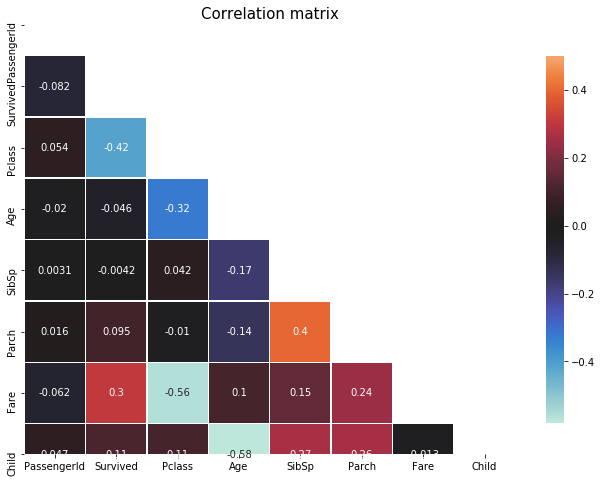

In [535]:
#Correlation matrix. I applied mask on this correlation matrix

corr = train_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask,annot=True,vmax=.5,center=0,square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Correlation matrix', fontsize = 15)

plt.show()



A.1.4 <br/>
From the correlation matrix, it seems the most correlated attribute with the survival rate is the fare. Followed by Parch.

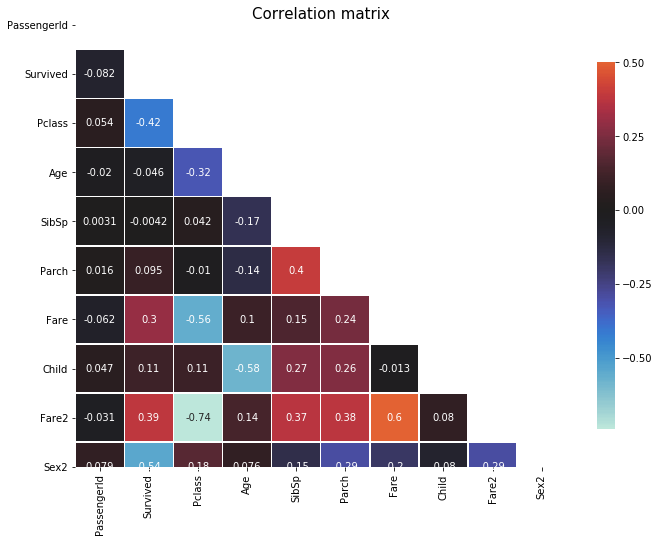

In [559]:
#Fare 2 attribute

for dataset in data:
    dataset['Fare2'] = dataset['Fare'].apply(lambda x: 1 if x < 10 else ( 2 if x >= 10 and x < 20 else ( 3 if x >=20 and x<30 else 4) ))

corr = train_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, 
            mask=mask,
            annot=True,
            vmax=.5,
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .75})
plt.title('Correlation matrix', fontsize = 15)

plt.show()


In [493]:
#Survival Rate based on Fare Class
farelow = train_df[train_df['Fare2']==1]
faremid = train_df[train_df['Fare2']==2]
farehigh = train_df[train_df['Fare2']==3]
fareplus = train_df[train_df['Fare2']==4]

#Fare low
lSurv = farelow[farelow['Survived']==1]
lDied = farelow[farelow['Survived']==0]
lSurvLen = len(lSurv)
totPasLenLow = len(lDied) + len(lSurv)
lsrate = (lSurvLen/totPasLenLow)
print('Low fare survival rate is', lsrate)

#Fare mid
mSurv = faremid[faremid['Survived']==1]
mDied = faremid[faremid['Survived']==0]
mSurvLen = len(mSurv)
totPasLenMid = len(mDied) + len(mSurv)
msrate = (mSurvLen/totPasLenMid)
print('Mid fare survival rate is', msrate)

#Fare high
hSurv = farehigh[farehigh['Survived']==1]
hDied = farehigh[farehigh['Survived']==0]
hSurvLen = len(hSurv)
totPasLenHigh = len(hDied) + len(hSurv)
hsrate = (hSurvLen/totPasLenHigh)
print('High fare survival rate is', hsrate)

#Fare plus
pSurv = fareplus[fareplus['Survived']==1]
pDied = fareplus[fareplus['Survived']==0]
pSurvLen = len(pSurv)
totPasLenPlus = len(pDied) + len(pSurv)
psrate = (pSurvLen/totPasLenPlus)
print('Plus fare survival rate is', psrate)


Low fare survival rate is 0.17040358744394618
Mid fare survival rate is 0.43859649122807015
High fare survival rate is 0.4444444444444444
Plus fare survival rate is 0.6506024096385542


Low fare survival rate is 0.17040358744394618 <br/>
Mid fare survival rate is 0.43859649122807015<br/>
High fare survival rate is 0.4444444444444444<br/>
Plus fare survival rate is 0.6506024096385542<br/>

From the correlation matrix, we can conclude again that Fare2 is related with the survival rate(The correlation score is 0.39 with max score of 0.5) . Fare2 itself is correlated with the SibSP and Parch of the MRS Titanic. But SibSP and Parch only don't have a high correlation
with the survival rate even though it is still higher than the other attributes except Fare (And also Fare 2).

In the end, we can conclude that the higher fare price determines the survival rate because of the placement
of the parch or Sipsb that might be closer to the emergency boat.

Note: I have a problem that the label was cut off. At the first time it didn't show up for Fare2 and Survived matrix block. After I made it not the last column (in the next chapter I added an extra column) it finally shows the score of 0.39

<h1>Naive Bayes Prediction</h1>

In [560]:
for dataset in data:
    dataset['Sex2'] = dataset['Sex'].apply(lambda x: 1 if x=="male" else 0)

In [561]:
train_df

,PassengerId,Survived,Pclass,Name,FullName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,Fare2,Sex2
0,299,1,1,Saalfeld,Mr. Adolphe,male,39.0,0,0,19988,30.5000,C106,S,0,4,1
1,300,1,1,Baxter,Mrs. James (Helene DeLaudeniere Chaput),female,50.0,0,1,PC 17558,247.5208,B58 B60,C,0,4,0
2,301,1,3,Kelly,Miss. Anna Katherine Annie Kate,female,26.0,0,0,9234,7.7500,NaN,Q,0,1,0
3,302,1,3,McCoy,Mr. Bernard,male,25.0,2,0,367226,23.2500,NaN,Q,0,3,1
4,303,0,3,Johnson,Mr. William Cahoone Jr,male,19.0,0,0,LINE,0.0000,NaN,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,887,0,2,Montvila,Rev. Juozas,male,27.0,0,0,211536,13.0000,NaN,S,0,2,1
589,888,1,1,Graham,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,0,4,0
590,889,0,3,Johnston,Miss. Catherine Helen Carrie,female,24.0,1,2,W./C. 6607,23.4500,NaN,S,0,3,0
591,890,1,1,Behr,Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,0,4,1


In [562]:

    
#train set application
gnbModel = GaussianNB ()
gnbModel.fit( train_df [['Child' , 'Sex2' ] ] , train_df ['Survived'])
y_train = train_df ['Survived'].values
y_pred = gnbModel.predict(train_df[['Child','Sex2']])
print(metrics.classification_report( y_train , y_pred ) )

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       357
           1       0.69      0.74      0.71       236

    accuracy                           0.77       593
   macro avg       0.76      0.76      0.76       593
weighted avg       0.77      0.77      0.77       593



In [563]:
#test set application
y_test = test_df['Survived'].values
y_pred = gnbModel.predict( test_df[['Child','Sex2']])
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       192
           1       0.63      0.77      0.69       106

    accuracy                           0.76       298
   macro avg       0.74      0.76      0.75       298
weighted avg       0.78      0.76      0.76       298



In [564]:
#Train set Application
gnbModel = GaussianNB ()
gnbModel.fit( train_df [['Child' , 'Sex2', 'Fare2' ] ] , train_df ['Survived'])
y_train = train_df ['Survived'].values
y_pred = gnbModel.predict(train_df[['Child','Sex2','Fare2']])
print(metrics.classification_report( y_train , y_pred ) )

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       357
           1       0.73      0.70      0.72       236

    accuracy                           0.78       593
   macro avg       0.77      0.77      0.77       593
weighted avg       0.78      0.78      0.78       593



In [565]:
#test set application
y_test = test_df['Survived'].values
y_pred = gnbModel.predict( test_df[['Child','Sex2', 'Fare2']])
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       192
           1       0.66      0.75      0.70       106

    accuracy                           0.77       298
   macro avg       0.75      0.77      0.76       298
weighted avg       0.78      0.77      0.77       298



Precision is the ability of a classifier not to label a positivite instance (True Positive)
which the actual value is negative (False Positive). 
Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

Recall shows the ability of our classivier to find allpositive instances(TP and FP).
Recall: Number of positives that are correctly identified.
Recall = TP/(TP+FN)

The F1 score is a combination mean of precision and recall. The score is between 0.0 to 1. Higher is better. 
F1 scores are lower than accuracy measures because it takes into account precision and recall and compute it.
The weighted average of F1 should be used to compare our classifier models and not for global accuracy.

Support, is the amount of instances (in this case, survived and not survived)

When we add Fare2 attribute, the accuracy score increseas. 





<h1> Decision Tree </h1>

In [566]:
#First Combination
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_df[['Pclass', 'Fare2', 'Child', 'Sex2']],train_df['Survived'])
data_feature_names = ['Pclass', 'Fare2','Child', 'Sex2']
dot_data = tree.export_graphviz(clf, out_file="tree.dot",feature_names=data_feature_names, class_names = True, filled = True,
                               rounded = True, precision=0)
print("Accuracy score:",clf.score(train_df[['Pclass','Fare2', 'Child', 'Sex2']],train_df['Survived']))
'''
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
Image(graph.write_png('.decTree.png'))

'''



Accuracy score: 0.8313659359190556


"\ngraph = pydotplus.graph_from_dot_data(dot_data)\nImage(graph.create_png())\nImage(graph.write_png('.decTree.png'))\n\n"

<img src="tree.png">

In [567]:
#Second Combination
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(train_df[['Fare2', 'Child', 'Sex2']],train_df['Survived'])
data_feature_names2 = ['Fare2','Child', 'Sex2']
dot_data = tree.export_graphviz(clf, out_file="tree2.dot",feature_names=data_feature_names, class_names = True, filled = True, rounded = True, precision=0)

print("Accuracy score:",clf2.score(train_df[['Fare2', 'Child', 'Sex2']],train_df['Survived']))


Accuracy score: 0.7942664418212478


<img src="tree2.png">

Result:
    
To determine the "goodness" of our true and false split
in this decision tree, we used Gini impurity.

The accuracy score of our first tree with 4 attributes is 0.8313659359190556 <br/>
The accuracy score of our second tree with 3 attributes is 0.7942664418212478

Darker blue: More chances to survive
Darker orange: More chances to die

From the first tree:
Highest chance of surviving is if the passenger is in the first class, paying Fare2 of cattegory 4,and adult. The second one is the characteristics but children

From the second tree:
Highest chance of surviving is if the passenger is in the Paying fare 1 or 2 and a child

Note:<br/>
I have problem on showing the graph in the notebook. Thus, I exported the dot and converted it into png image. The images will be included in the file that I sent.